# Ejercicio 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import collections

### Item A

Estado n -> n solicitudes en el sistema <br>
\[    39/40     , 1/40                       , 0                          ,              0 , 0 , ..... 0 ] <br>
[ 1/30 * 39/40 , (29/30)*(39/40)+(1/30*1/40), (29/30)*(1/40)             ,              0 , 0 , ..... 0 ] <br>
[ 0            , 1/30 * 39/40               , (29/30)*(39/40)+(1/30*1/40), (29/30)*(1/40) , 0 , ..... 0 ]

La Matriz de transiciones va a ser de N*N siendo N la cantidad de iteraciones deseadas.

In [15]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}) #Seteo a 5 decimales
p = 1/40
q = 1/30

Cant_de_solic = 0

N = 20 #Definimos la cantidad de estamos, con el item B justificamos porque decidimos tomar este N.

def fillMatrix(matrix,N):
    matrix[0][0] = 1 - p
    matrix[0][1] = p
    for x in range(1,N-1):
        matrix[x][x-1] = q*(1-p)
        matrix[x][x] = (1-q)*(1-p)+(p*q)
        matrix[x][x+1] = (1-q)*p
    matrix[N-1][N-2] = q
    matrix[N-1][N-1] = 1-q

T = np.zeros(shape=(N,N)) 
fillMatrix(T,N)

### Item B y C

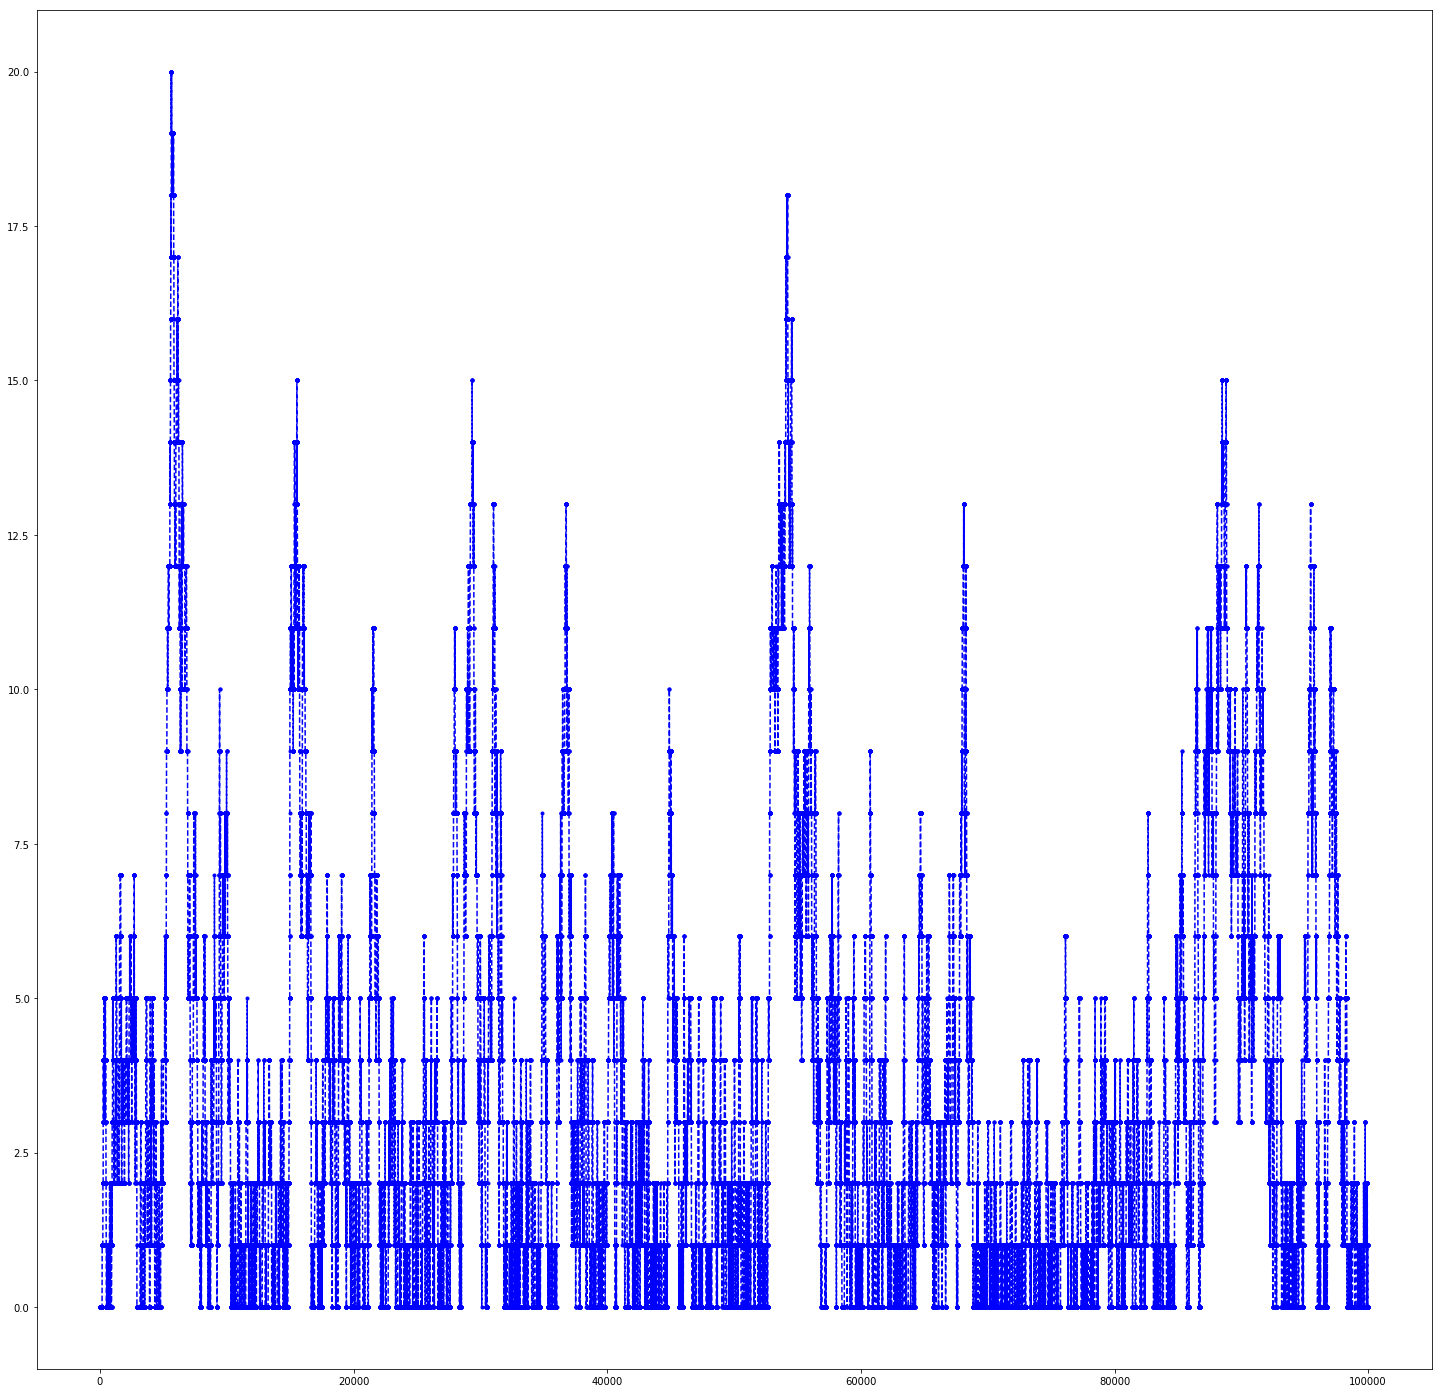

In [12]:
def getSolicitudes(N) :
    cantidadSolicitudesActual = 0
    cantidadSolicitud = []
    estaProcesando = False
    
    for x in range(N):
        probLlegada = np.random.uniform(low=0, high=1, size=1)[0]
        probSalida = np.random.uniform(low=0, high=1, size=1)[0]
        # Tomamos como que si la iteracion de 10milisegundos arrranca con 0 solicitudes, 
        # en la misma no se procesa nada.
        cantidadSolicitud.append(cantidadSolicitudesActual)
        if ((estaProcesando) and (probSalida <= 1/30)):
            estaProcesando = False
            cantidadSolicitudesActual -= 1
        if (cantidadSolicitudesActual >= 1):
            estaProcesando = True
        if (probLlegada <= 1/40):
            cantidadSolicitudesActual += 1
    return cantidadSolicitud

solicitudes = getSolicitudes(itera)
fig= plt.figure(figsize=(25,25))
plt.plot(solicitudes, linestyle='--' ,marker='.', color='b') 
plt.show()

Probamos la acotacion que hicimos en la matriz de transicion corriendo el experimento 50 veces

In [ ]:
cantidades = []
for x in range(50):
    solicitudes = getSolicitudes(itera)
    cantidades.append(max(solicitudes))

plt.hist(cantidades)
plt.show()

Vemos que el servidor no llega a tener mas de 50 solicitudes al mismo tiempo por lo que decidimos acotar la cantidad de estados

### Item D

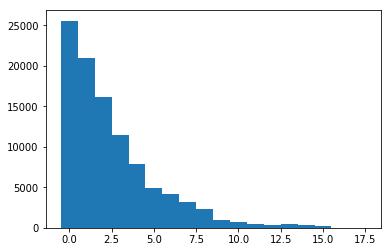

In [6]:
bins = np.arange(-0.5,max(solicitudes)+0.5,1)
plt.hist(solicitudes, bins=bins)
plt.show()

### Item E

In [9]:
cantidadSinProcesar = collections.Counter(solicitudes).get(0)
print("Porcentaje de iteraciones que no esta procesando %" + str((cantidadSinProcesar/itera) * 100))

Porcentaje de iteraciones que no esta procesando %25.556
